In [ ]:
## EDA File
    ## General dataset exploration

Import & Instantiate All Required Modules

In [5]:
import sys

# Manually add the project root to sys.path
sys.path.append('/Users/joaquinuriarte/Documents/GitHub/sports-betting/')


# === STEP 0: Imports
import pandas as pd
from model_binaries.utils.binary_utils import save_entity, load_entity, graph_entity, train_random_forest_and_rank_features

Load Processed Dataset Into Memory

In [2]:
# File path to processed_dataset
processed_dataset_folder_path = "/Users/joaquinuriarte/Documents/GitHub/sports-betting/processed_datasets/model_v0"

processed_dataset = load_entity(processed_dataset_folder_path, "processed_dataset.pkl")

Averaged Statistics for Teams Player's Stats

In [3]:
team_a_features = processed_dataset.features.filter(like='A_player').groupby(lambda x: x.split('_', 3)[-1], axis=1).mean()
team_b_features = processed_dataset.features.filter(like='B_player').groupby(lambda x: x.split('_', 3)[-1], axis=1).mean()

In [5]:
team_a_features.describe()

,AST,DREB,FG3_PCT,FG_PCT,FT_PCT,MIN,OREB,PF,PLUS_MINUS,PTS,TO
count,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000
mean,2.552395,3.551774,0.232069,0.447659,0.503483,27.111899,1.176091,2.261497,0.267413,11.681115,1.537089
std,0.648895,0.740683,0.102744,0.072803,0.140227,2.865531,0.483285,0.551400,7.609776,1.963125,0.462755
min,0.250000,0.625000,0.000000,0.182250,0.000000,9.304167,0.000000,0.375000,-28.500000,2.375000,0.125000
25%,2.125000,3.062500,0.158312,0.398250,0.406250,25.900000,0.875000,1.875000,-5.125000,10.500000,1.250000
50%,2.500000,3.562500,0.224875,0.446500,0.500000,27.643750,1.125000,2.250000,0.250000,11.750000,1.500000
75%,3.000000,4.062500,0.297500,0.496125,0.600000,28.801042,1.500000,2.625000,5.562500,13.000000,1.875000
max,5.500000,6.625000,0.739625,0.770750,1.000000,42.794792,4.625000,4.812500,30.875000,20.000000,3.625000


In [6]:
team_b_features.describe()

,AST,DREB,FG3_PCT,FG_PCT,FT_PCT,MIN,OREB,PF,PLUS_MINUS,PTS,TO
count,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000,25465.000000
mean,2.550024,3.550791,0.233034,0.447914,0.503940,27.084453,1.174990,2.253120,0.323534,11.695189,1.535329
std,0.646837,0.740571,0.103172,0.072629,0.139037,2.867365,0.483661,0.545611,7.611623,1.972639,0.468022
min,0.250000,0.625000,0.000000,0.167625,0.000000,11.483333,0.000000,0.500000,-36.687500,3.125000,0.125000
25%,2.125000,3.062500,0.158250,0.399250,0.409250,25.829167,0.875000,1.875000,-5.000000,10.500000,1.250000
50%,2.500000,3.562500,0.225500,0.447125,0.500000,27.622917,1.125000,2.250000,0.437500,11.750000,1.500000
75%,3.000000,4.062500,0.300000,0.496000,0.600000,28.790625,1.500000,2.625000,5.750000,13.000000,1.875000
max,6.125000,6.750000,0.771375,0.743375,0.984375,40.708333,3.437500,4.750000,34.000000,20.500000,3.875000


Data Info

In [9]:
team_a_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25465 entries, 11400001 to 52100211
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AST         25465 non-null  float64
 1   DREB        25465 non-null  float64
 2   FG3_PCT     25465 non-null  float64
 3   FG_PCT      25465 non-null  float64
 4   FT_PCT      25465 non-null  float64
 5   MIN         25465 non-null  float64
 6   OREB        25465 non-null  float64
 7   PF          25465 non-null  float64
 8   PLUS_MINUS  25465 non-null  float64
 9   PTS         25465 non-null  float64
 10  TO          25465 non-null  float64
dtypes: float64(11)
memory usage: 2.3 MB


In [10]:
team_b_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25465 entries, 11400001 to 52100211
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AST         25465 non-null  float64
 1   DREB        25465 non-null  float64
 2   FG3_PCT     25465 non-null  float64
 3   FG_PCT      25465 non-null  float64
 4   FT_PCT      25465 non-null  float64
 5   MIN         25465 non-null  float64
 6   OREB        25465 non-null  float64
 7   PF          25465 non-null  float64
 8   PLUS_MINUS  25465 non-null  float64
 9   PTS         25465 non-null  float64
 10  TO          25465 non-null  float64
dtypes: float64(11)
memory usage: 2.3 MB


Graph Distribution for Each Feature

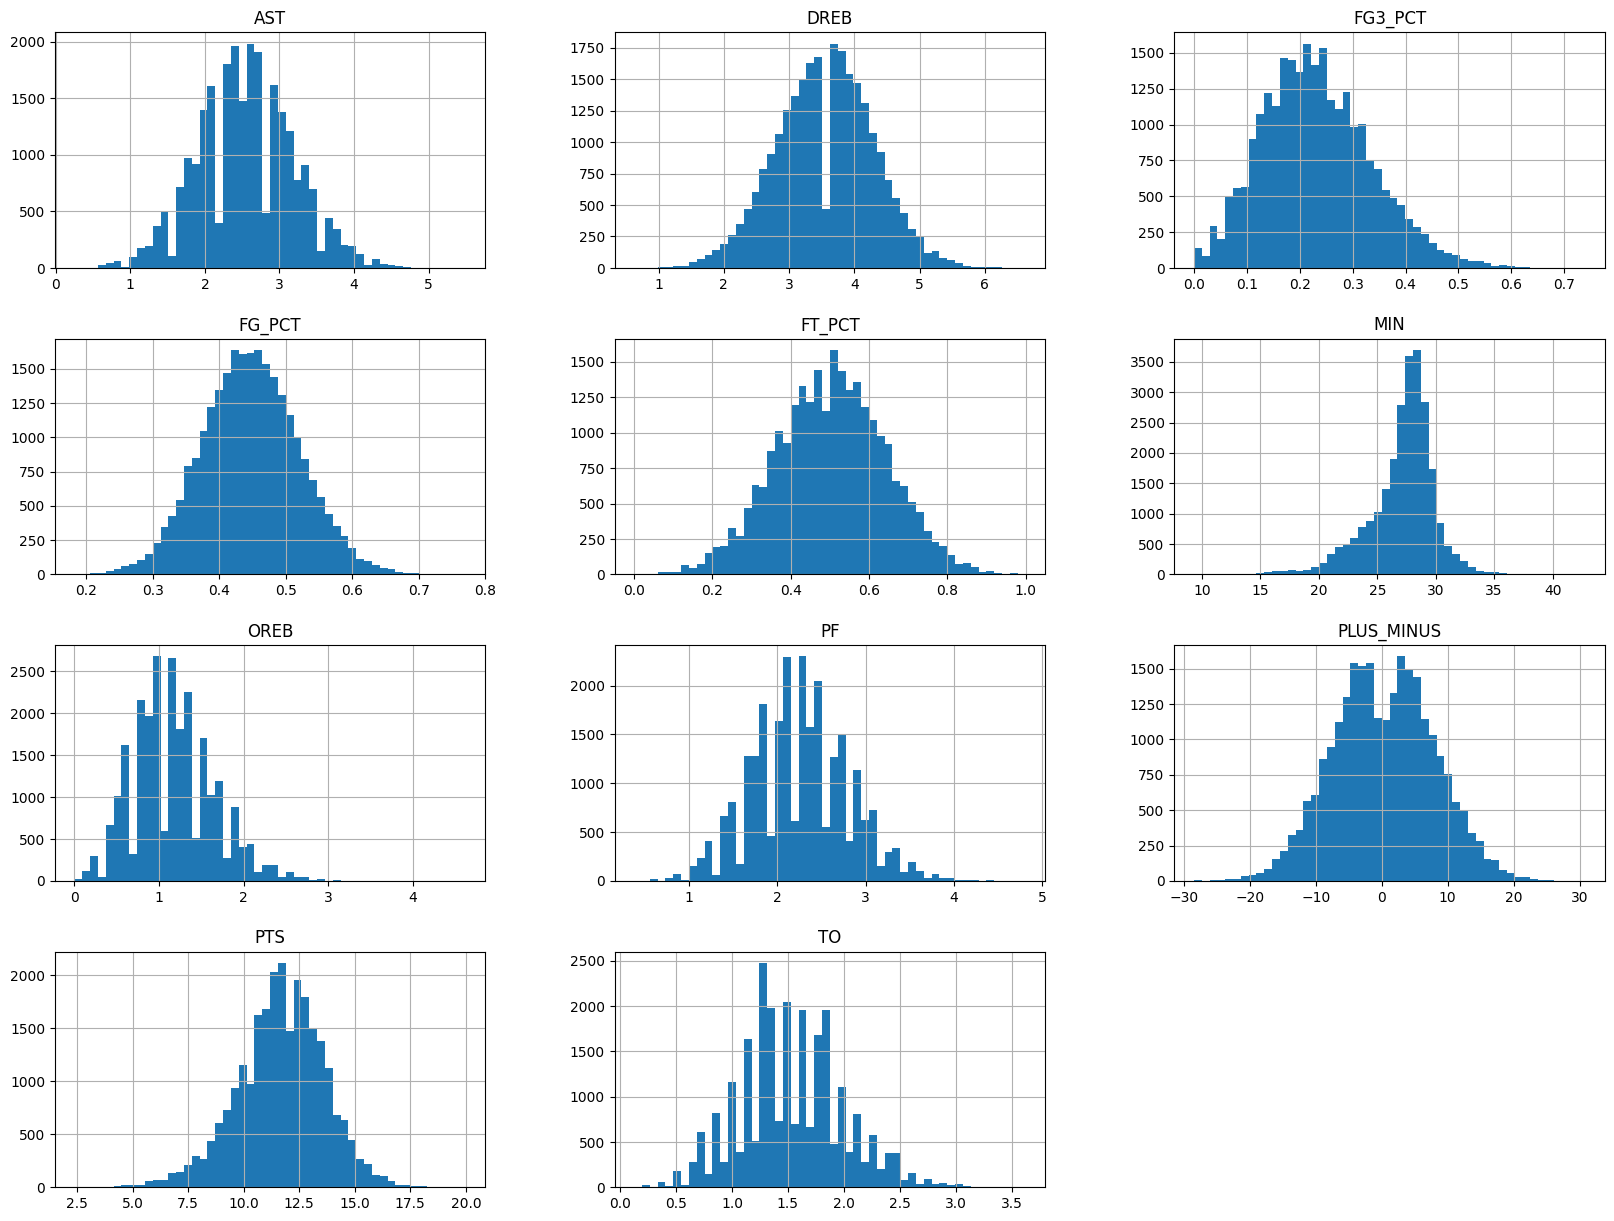

In [7]:
graph_entity(team_a_features, 50)

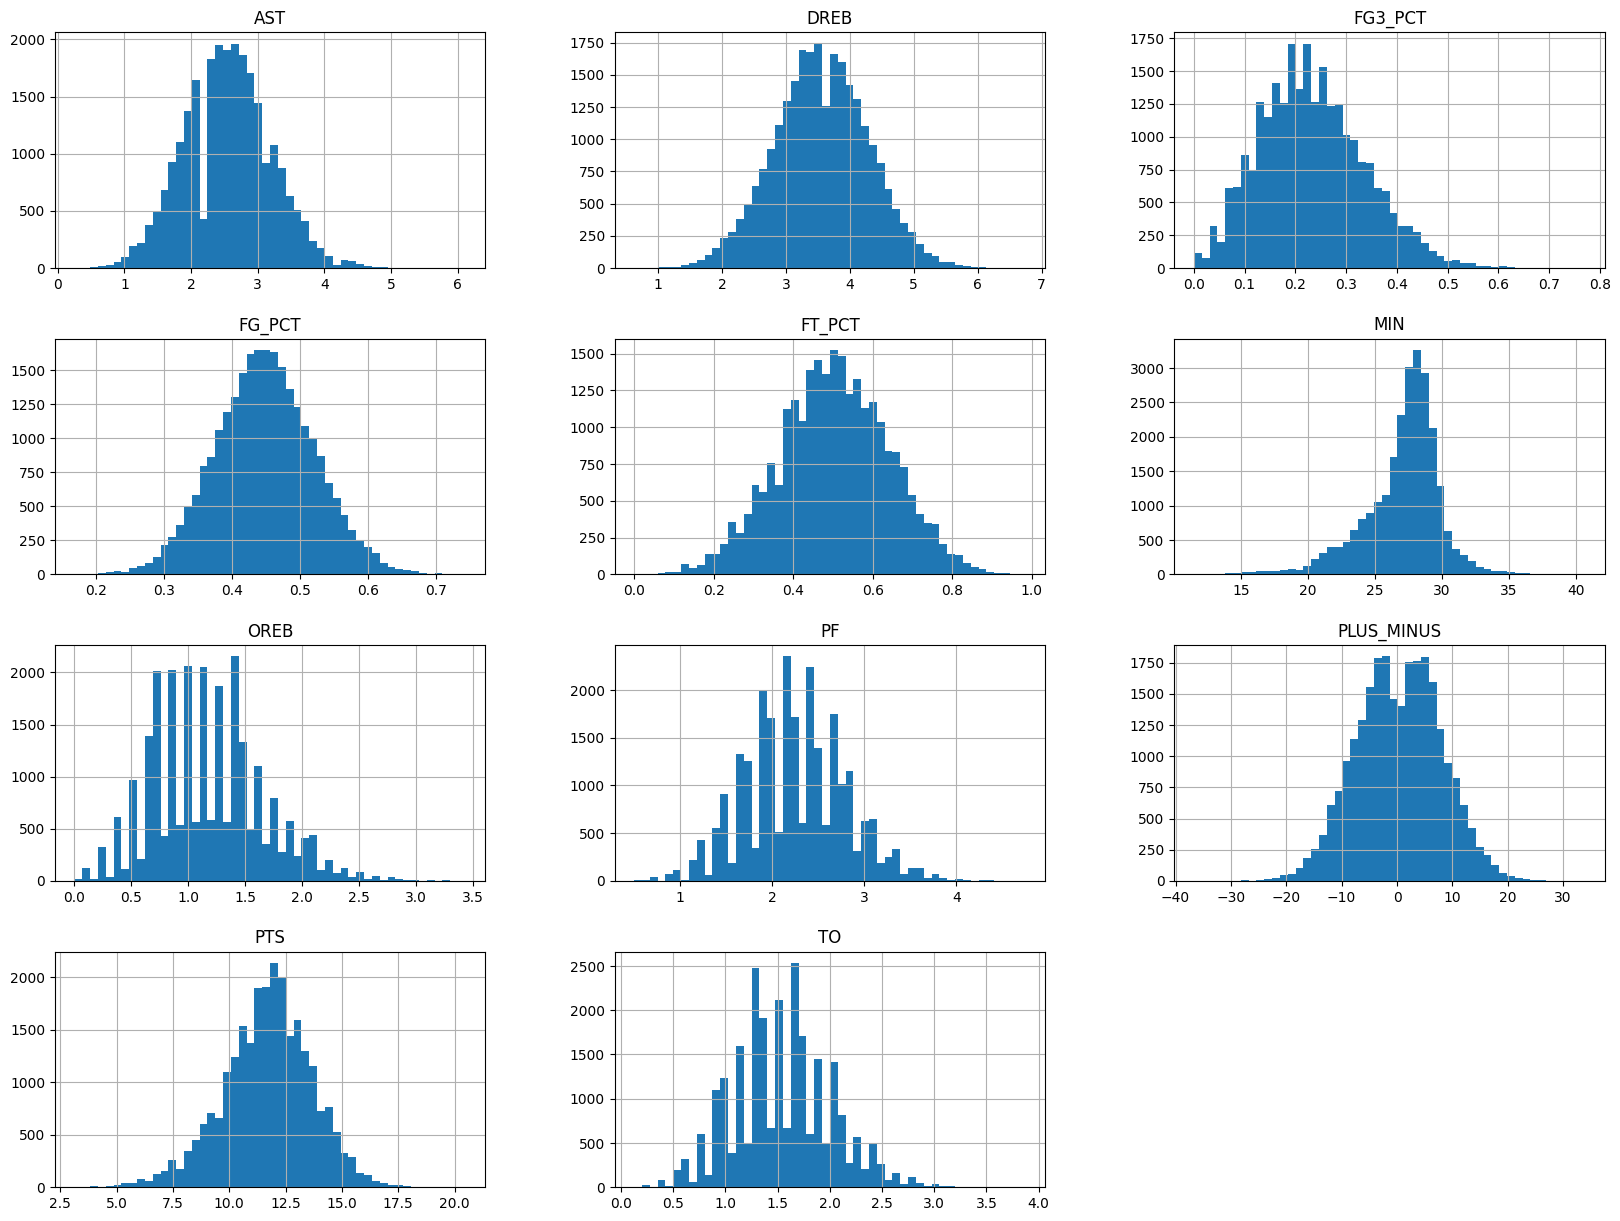

In [8]:
graph_entity(team_b_features, 50)

Random Test Cases for Dataset

In [4]:
assert all(
    col.startswith(("A_", "B_")) or col == "Team_A_Wins"
    for col in processed_dataset.features.columns
), "Unexpected columns found in the dataset."
assert processed_dataset.features["Team_A_Wins"].dtype == "int", "Team_A_Wins must be integer."

assert not processed_dataset.features.isna().any().any(), "Dataset contains missing values."
assert (
    abs(processed_dataset.features.filter(like="A_").mean().mean() - processed_dataset.features.filter(like="B_").mean().mean())
    < .1
), "Team A and Team B feature distributions are significantly different."
min_columns = [col for col in processed_dataset.features.columns if col.endswith("_MIN")]
assert processed_dataset.features[min_columns].min().min() >= 0, "Negative MIN values detected."

Feature Importance Analysis

In [6]:
Y = processed_dataset.features["Team_A_Wins"]
X = pd.concat([team_a_features, team_b_features], axis=1)
rf_params = {"n_estimators": 100, "random_state": 42}

feature_ranking = train_random_forest_and_rank_features(X, Y, rf_params)

print(feature_ranking)

       Feature  Importance
8   PLUS_MINUS    0.057449
19  PLUS_MINUS    0.054121
14      FG_PCT    0.053173
16         MIN    0.052343
3       FG_PCT    0.051330
5          MIN    0.051105
4       FT_PCT    0.050771
2      FG3_PCT    0.050406
13     FG3_PCT    0.050402
15      FT_PCT    0.050132
9          PTS    0.044487
20         PTS    0.044315
1         DREB    0.041125
12        DREB    0.040760
11         AST    0.039502
0          AST    0.039411
7           PF    0.038843
6         OREB    0.038696
18          PF    0.038420
21          TO    0.038369
10          TO    0.037899
17        OREB    0.036940


Correlation Analysis

Correlation analysis: printing feature pairs with more than 0.8 correlation coefficient.
Complete
